## Main function

In [ ]:
from PIL import Image
import os
from datetime import datetime, timedelta
import time

In [171]:
def get_mata_timestamp(path):
    cur = pathlib.Path(path)
    timestamp = cur.stat().st_mtime
    int_timestamp = int(timestamp)
    mod_timestamp = str(timestamp - int_timestamp)[2:5]
   # print('before', mod_timestamp)
    if len(mod_timestamp)<3:
        mod_timestamp = mod_timestamp.zfill(3)
        #print('ather', mod_timestamp)
    number = str(int_timestamp) + str(mod_timestamp)
    int_s = int(number)
    date = datetime.fromtimestamp(int_s // 1000), int_s % 1000
    return timestamp,number, date


In [ ]:
def rename_bmp_jpg(mypath):

    onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    for fname in onlyfiles:
        timestamp_disk, number_disk, real_date = get_mata_timestamp(os.path.join(mypath,fname))
        number_camera = int(fname[9:].replace('.bmp', ''))
        time_camera = datetime.fromtimestamp(number_camera // 1000), number_camera % 1000

        result_name =mypath +'/' + str(number_camera) + '_' + str(number_disk) + '.jpg'
        Image.open(os.path.join(mypath,fname)).save(result_name,  quality=90)

    for fname in onlyfiles:
        if 'bmp' in fname:
            os.remove(os.path.join(mypath,fname))

In [ ]:
def fname2time(fname):
    int_s = int(fname)
    return datetime.fromtimestamp(int_s // 1000), int_s % 1000

def name_transform(name):
    timestamp_disk = name.split('_')[1].split('.')[0]
    timestamp_camera = name.split('_')[0]
    return timestamp_camera, timestamp_disk

In [ ]:
from os import listdir
from os.path import isfile, join
import time
from datetime import datetime, timedelta
import time

def get_delta_from_jpg_names(mypath):

    onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    delta_disk_arr = []
    delta_camera_arr = []

    for i in range(len(onlyfiles)):

        if i != 0:
            timestamp_camera_curr, timestamp_disk_curr = name_transform(onlyfiles[i])
            time_camera_curr = fname2time(timestamp_camera_curr)
        
            time_disk_curr = fname2time(timestamp_disk_curr)

            timestamp_camera_past, timestamp_disk_past = name_transform(onlyfiles[i-1])
            time_camera_past = fname2time(timestamp_camera_past)
            time_disk_past = fname2time(timestamp_disk_past)

            delta_disk  = time_disk_curr[0] - time_disk_past[0]
            delta_camera  = time_camera_curr[0] - time_camera_past[0]
        
            if str(delta_camera) == '0:00:00' and str(delta_disk) == '0:00:00' :
                delta_disk = abs(time_disk_curr[1]-time_disk_past[1])
                delta_camera = abs(time_camera_curr[1]-time_camera_past[1])

                delta_disk_arr.append(delta_disk)
                delta_camera_arr.append(delta_camera)


            elif str(delta_camera) != '0:00:00':
       
                delta_past_camera = 1000 - time_camera_past[1]
                delta_camera = delta_past_camera + time_camera_curr[1] 

                delta_disk = abs(time_disk_curr[1]-time_disk_past[1])

                delta_disk_arr.append(delta_disk)
                delta_camera_arr.append(delta_camera)


            elif str(delta_disk) != '0:00:00': 

                delta_past_disk = 1000 - time_disk_past[1]
                delta_disk = delta_past_disk + time_disk_curr[1] 
                
                delta_camera = abs(time_camera_curr[1]-time_camera_past[1])

                delta_disk_arr.append(delta_disk)
                delta_camera_arr.append(delta_camera)

            else:

                delta_past_camera = 1000 - time_camera_past[1]
                delta_camera = delta_past_camera + time_camera_curr[1] 

                delta_past_disk = 1000 - time_disk_past[1]
                delta_disk = delta_past_disk + time_disk_curr[1] 

                delta_disk_arr.append(delta_disk)
                delta_camera_arr.append(delta_camera)  
        else:
            pass
    return delta_camera_arr, delta_disk_arr

In [ ]:
#remove the peaks that were in between shots

def sort_time_value(delta_camera_arr,delta_disk_arr, threshold):

     for idx in reversed(range(len(delta_disk_arr))):
          if (delta_disk_arr[idx] > threshold) or (delta_disk_arr[idx] == 0) :
               del delta_disk_arr[idx]
          else:
               continue
     for idx in reversed(range(len(delta_camera_arr))):
          if (delta_camera_arr[idx] > threshold) or (delta_camera_arr[idx] == 0) :
               del delta_camera_arr[idx]
          else:
               continue

     return delta_camera_arr,delta_disk_arr

In [ ]:
def plot_delta_time(delta_camera_arr, delta_disk_arr):
    fig,ax = plt.subplots(1,1,figsize = (15,6))

    ax.plot(delta_disk_arr, label="disk_time")
    ax.plot(delta_camera_arr, label="camera time")
    ax.legend()
    plt.ylabel('time delta, ms')
    plt.xlabel('idx photo')
    plt.title('Time gap between nearest photo')
    plt.show()

In [ ]:
if __name__ == "__main__":
    mypath = 'Z:/CV/dataset_for_Anya/0'
    threshold = 60 #для сортировки лишних значений между сериями съемки
    rename_bmp_jpg(mypath)
    delta_camera_arr, delta_disk_arr = get_delta_from_jpg_names(mypath)
    sort_time_value(delta_camera_arr,delta_disk_arr, threshold)
    plot_delta_time(delta_camera_arr, delta_disk_arr)

## A more complete description

### Save from bmp to jpeg. 

У тебя у файла есть имя <timestamp_camera>.jpg , это таймштамп момента, когда камера зафиксировала фотку. И есть метаданные файла, в которых время записи на диск. Нам нужно сохранить и то, и другое. Но, когда ты сжимаешь файл, у тебя метаданные перезапишутся. Поэтому их тоже можно записать в имя нового файла. Т.е. <timestamp_camera>|<timestamp_disk>.jpg

In [ ]:
from datetime import datetime, timedelta
import time
def get_mata_timestamp(path):
    cur = pathlib.Path(path)
    timestamp = cur.stat().st_mtime
    int_timestamp = int(timestamp)
    mod_timestamp = str(timestamp - int_timestamp)[2:5]
   # print('before', mod_timestamp)
    if len(mod_timestamp)<3:
        mod_timestamp = mod_timestamp.zfill(3)
        #print('ather', mod_timestamp)
    number = str(int_timestamp) + str(mod_timestamp)
    int_s = int(number)
    date = datetime.fromtimestamp(int_s // 1000), int_s % 1000
    return timestamp,number, date

In [172]:
mypath = 'Z:/CV/dataset_for_Anya/0'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
for fname in onlyfiles:

    print(fname)
    timestamp_disk, number_disk, real_date = get_mata_timestamp(os.path.join(mypath,fname))
    print('timestamp disk: ', timestamp_disk)
    print('REAL DISK TIME', real_date)


    number_camera = int(fname[9:].replace('.bmp', ''))
    print('timestamp camera: ', number_camera)
    time_camera = datetime.fromtimestamp(number_camera // 1000), number_camera % 1000
    print('REAL CAMERA TIME: ', time_camera)

    result_name =mypath +'/' + str(number_camera) + '_' + str(number_disk) + '.jpg'
    print('result_name', result_name)
    print('----------------------------')
    Image.open(os.path.join(mypath,fname)).save(result_name,  quality=90)

for fname in onlyfiles:
    if 'bmp' in fname:
        os.remove(os.path.join(mypath,fname))


Image_0001686256227033.bmp
timestamp disk:  1686256227.1284945
REAL DISK TIME (datetime.datetime(2023, 6, 8, 23, 30, 27), 128)
timestamp camera:  1686256227033
REAL CAMERA TIME:  (datetime.datetime(2023, 6, 8, 23, 30, 27), 33)
result_name Z:/CV/dataset_for_Anya/0/1686256227033_1686256227128.jpg
----------------------------
Image_0001686256227081.bmp
timestamp disk:  1686256227.1284945
REAL DISK TIME (datetime.datetime(2023, 6, 8, 23, 30, 27), 128)
timestamp camera:  1686256227081
REAL CAMERA TIME:  (datetime.datetime(2023, 6, 8, 23, 30, 27), 81)
result_name Z:/CV/dataset_for_Anya/0/1686256227081_1686256227128.jpg
----------------------------
Image_0001686256227128.bmp
timestamp disk:  1686256227.1909785
REAL DISK TIME (datetime.datetime(2023, 6, 8, 23, 30, 27), 190)
timestamp camera:  1686256227128
REAL CAMERA TIME:  (datetime.datetime(2023, 6, 8, 23, 30, 27), 128)
result_name Z:/CV/dataset_for_Anya/0/1686256227128_1686256227190.jpg
----------------------------
Image_0001686256227175.b

### Get time from image's names

In [43]:
def fname2time(fname):
    int_s = int(fname)
    return datetime.fromtimestamp(int_s // 1000), int_s % 1000

In [41]:
def name_transform(name):
    timestamp_disk = name.split('_')[1].split('.')[0]
    timestamp_camera = name.split('_')[0]
    return timestamp_camera, timestamp_disk

In [226]:
from os import listdir
from os.path import isfile, join
import time
from datetime import datetime, timedelta
import time

mypath = 'Z:/CV/dataset_for_Anya/0'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
delta_disk_arr = []
delta_camera_arr = []

for i in range(len(onlyfiles)):
    print(i)
    if i != 0:
        timestamp_camera_curr, timestamp_disk_curr = name_transform(onlyfiles[i])
        time_camera_curr = fname2time(timestamp_camera_curr)
       
        time_disk_curr = fname2time(timestamp_disk_curr)

        timestamp_camera_past, timestamp_disk_past = name_transform(onlyfiles[i-1])
        time_camera_past = fname2time(timestamp_camera_past)
        time_disk_past = fname2time(timestamp_disk_past)
        print('time_disk_past:{}----cur:{}'.format(time_disk_past,time_disk_curr))
        print('time_camera past:{}----cur:{}'.format(time_camera_past,time_camera_curr))
        delta_disk  = time_disk_curr[0] - time_disk_past[0]
        delta_camera  = time_camera_curr[0] - time_camera_past[0]
    
        if str(delta_camera) == '0:00:00' and str(delta_disk) == '0:00:00' :
            delta_disk = abs(time_disk_curr[1]-time_disk_past[1])
            delta_camera = abs(time_camera_curr[1]-time_camera_past[1])

            print('Delta camera {} ms'.format(delta_camera))
            print('Delta disk {} ms'.format(delta_disk))
            delta_disk_arr.append(delta_disk)
            delta_camera_arr.append(delta_camera)
            print('------------------')

        elif str(delta_camera) != '0:00:00':
            print('NEW MINUTE camera')
            delta_past_camera = 1000 - time_camera_past[1]
            delta_camera = delta_past_camera + time_camera_curr[1] 

            delta_disk = abs(time_disk_curr[1]-time_disk_past[1])
            print('Delta camera {} ms'.format(delta_camera))
            print('Delta disk {} ms'.format(delta_disk))
            delta_disk_arr.append(delta_disk)
            delta_camera_arr.append(delta_camera)
            print('------------------')

        elif str(delta_disk) != '0:00:00': 
            print('NEW MINUTE disk')
            delta_past_disk = 1000 - time_disk_past[1]
            delta_disk = delta_past_disk + time_disk_curr[1] 
            
            delta_camera = abs(time_camera_curr[1]-time_camera_past[1])
            print('Delta camera {} ms'.format(delta_camera))
            print('Delta disk {} ms'.format(delta_disk))
            delta_disk_arr.append(delta_disk)
            delta_camera_arr.append(delta_camera)
            print('------------------')
        else:
            print('NEW MINUTE disk')
            print('NEW MINUTE camera')
            
            delta_past_camera = 1000 - time_camera_past[1]
            delta_camera = delta_past_camera + time_camera_curr[1] 

            delta_past_disk = 1000 - time_disk_past[1]
            delta_disk = delta_past_disk + time_disk_curr[1] 

            print('Delta camera {} ms'.format(delta_camera))
            print('Delta disk {} ms'.format(delta_disk))
            delta_disk_arr.append(delta_disk)
            delta_camera_arr.append(delta_camera)

            
    else:
        pass

0
1
time_disk_past:(datetime.datetime(2023, 6, 8, 23, 30, 27), 128)----cur:(datetime.datetime(2023, 6, 8, 23, 30, 27), 128)
time_camera past:(datetime.datetime(2023, 6, 8, 23, 30, 27), 33)----cur:(datetime.datetime(2023, 6, 8, 23, 30, 27), 81)
Delta camera 48 ms
Delta disk 0 ms
------------------
2
time_disk_past:(datetime.datetime(2023, 6, 8, 23, 30, 27), 128)----cur:(datetime.datetime(2023, 6, 8, 23, 30, 27), 190)
time_camera past:(datetime.datetime(2023, 6, 8, 23, 30, 27), 81)----cur:(datetime.datetime(2023, 6, 8, 23, 30, 27), 128)
Delta camera 47 ms
Delta disk 62 ms
------------------
3
time_disk_past:(datetime.datetime(2023, 6, 8, 23, 30, 27), 190)----cur:(datetime.datetime(2023, 6, 8, 23, 30, 27), 237)
time_camera past:(datetime.datetime(2023, 6, 8, 23, 30, 27), 128)----cur:(datetime.datetime(2023, 6, 8, 23, 30, 27), 175)
Delta camera 47 ms
Delta disk 47 ms
------------------
4
time_disk_past:(datetime.datetime(2023, 6, 8, 23, 30, 27), 237)----cur:(datetime.datetime(2023, 6, 8, 2

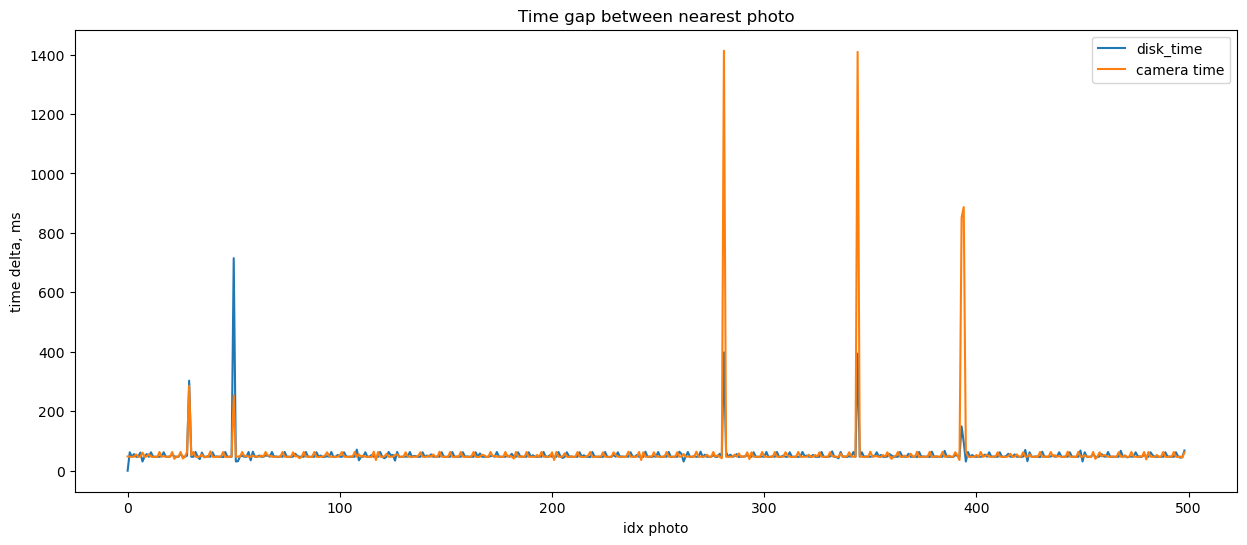

In [227]:
fig,ax = plt.subplots(1,1,figsize = (15,6))

ax.plot(delta_disk_arr, label="disk_time")
ax.plot(delta_camera_arr, label="camera time")
ax.legend()
plt.ylabel('time delta, ms')
plt.xlabel('idx photo')
plt.title('Time gap between nearest photo')
plt.show()

In [228]:
for idx in reversed(range(len(delta_disk_arr))):
     if (delta_disk_arr[idx] > 60) or (delta_disk_arr[idx] == 0) :
          del delta_disk_arr[idx]
     else:
          continue
for idx in reversed(range(len(delta_camera_arr))):
     if (delta_camera_arr[idx] > 60) or (delta_camera_arr[idx] == 0) :
          del delta_camera_arr[idx]
     else:
          continue


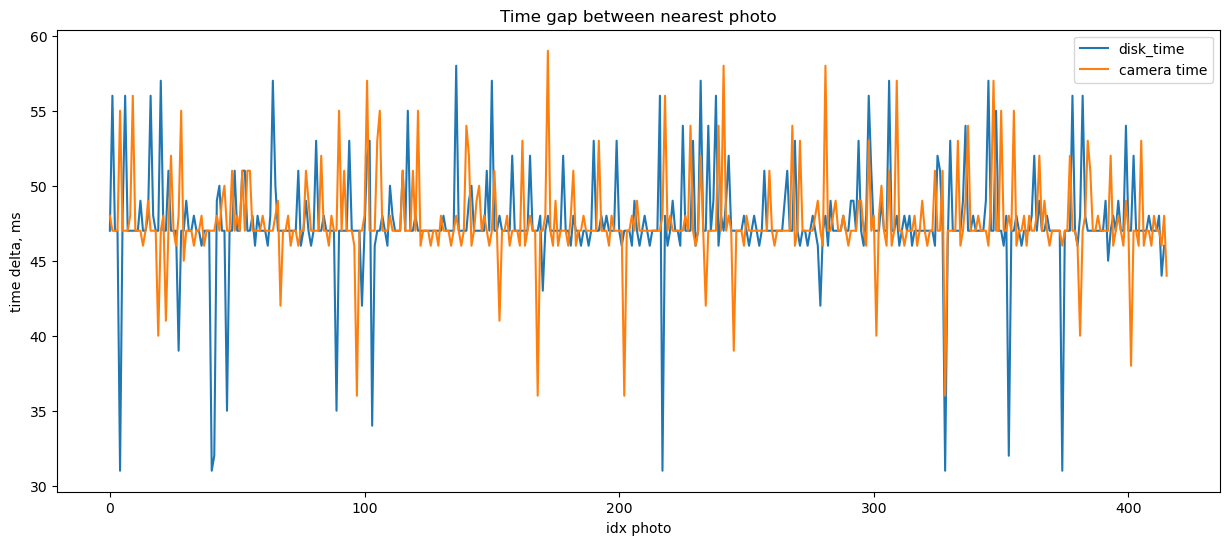

In [229]:
fig,ax = plt.subplots(1,1,figsize = (15,6))

ax.plot(delta_disk_arr, label="disk_time")
ax.plot(delta_camera_arr, label="camera time")
ax.legend()
plt.ylabel('time delta, ms')
plt.xlabel('idx photo')
plt.title('Time gap between nearest photo')
plt.show()


In [246]:
import numpy as np
print("Mean camera/disk: {} / {}, ms ".format(np.mean(delta_camera_arr),np.mean(delta_disk_arr)))
print("std camera/disk: {} / {}, ms ".format(np.std(delta_camera_arr),np.std(delta_disk_arr)))

Mean camera/disk: 47.58653846153846 / 47.501204819277106, ms 
std camera/disk: 2.7712832938324 / 3.402249219741227, ms 


### Определение времени создания между bmp кадрами

In [234]:
import os 
from os.path import isfile, join
import time
from datetime import datetime, timedelta
import time

#mypath_GC = 'Z:/CV/light_data/HDPI/GC'
#mypath_FX = 'Z:/CV/light_data/PET/FX'
mypath_GC ='Z:/CV/dataset_for_Anya/original/not_object'
onlyfiles = [f for f in listdir(mypath_GC) if isfile(join(mypath_GC, f))]

In [235]:
import datetime
import pathlib
delta_arr = []
for i in range(len(onlyfiles)):
    if i == len(onlyfiles)-1:
        break
    else:
        cur = pathlib.Path(os.path.join(mypath_GC,onlyfiles[i]))
        next = pathlib.Path(os.path.join(mypath_GC,onlyfiles[i+1]))
        # get modification time
        timestamp1 = cur.stat().st_mtime
        timestamp2 = next.stat().st_mtime
        c_time1 = datetime.datetime.fromtimestamp(timestamp1)
        c_time2 = datetime.datetime.fromtimestamp(timestamp2)

        delta = c_time2-c_time1
        #conver to float
        time_d_float = delta.total_seconds()
        delta_arr.append(time_d_float)

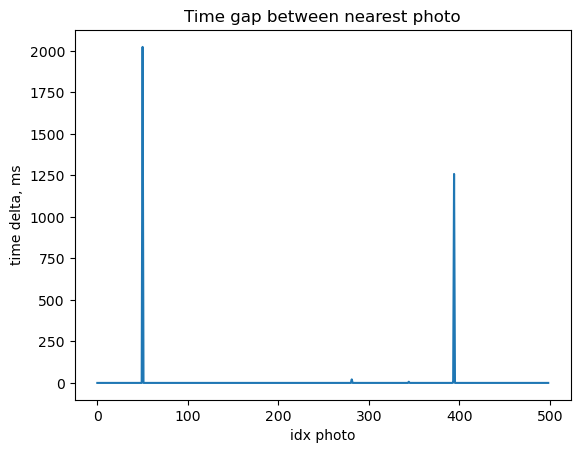

In [236]:
import matplotlib.pyplot as plt
plt.plot(delta_arr)
plt.ylabel('time delta, ms')
plt.xlabel('idx photo')
plt.title('Time gap between nearest photo')
plt.show()

In [239]:
for idx in reversed(range(len(delta_arr))):

     if (delta_arr[idx] > 0.06) and (delta_arr[idx]==0):
          delta_arr.pop(idx)
     else:
          continue

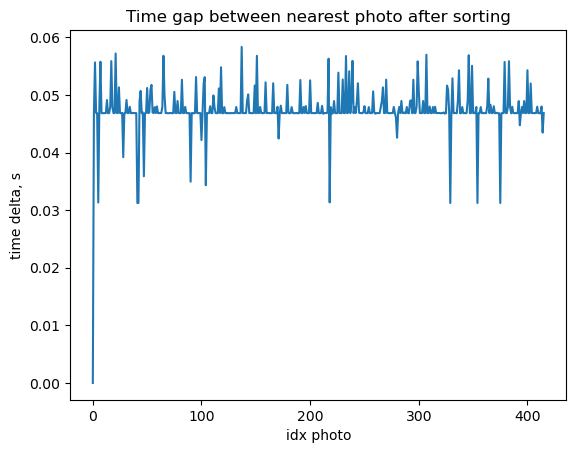

In [240]:
plt.plot(delta_arr)
plt.xlabel('idx photo')
plt.ylabel('time delta, s')
plt.title('Time gap between nearest photo after sorting')
plt.show()

In [241]:

import numpy as np

print("Mean: ", np.mean(delta_arr))
print("std: ",np.std(delta_arr))

Mean:  0.047372834134615384
std:  0.0040986171470584745
